## Loading Data

##### The data consists of the records NIFTY50 INDEX including details like - opening price, closing price, quantity of shares traded 

In [3]:
#import packages
import pandas as pd
import numpy as np

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('Data.csv')
print (df.columns)

#print the head
df.head()


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Shares Traded',
       'Turnover (Rs. Cr)'],
      dtype='object')


,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,2014-03-03,6264.35,6277.75,6212.25,6221.45,144562338,5040.12
1,2014-03-04,6216.75,6302.15,6215.70,6297.95,166818924,5550.29
2,2014-03-05,6328.45,6336.25,6287.80,6328.65,160300066,5754.58
3,2014-03-06,6344.75,6406.60,6339.70,6401.15,180731810,5844.96
4,2014-03-07,6413.95,6537.80,6413.55,6526.65,284922346,11368.15


### Indexing data as per the date

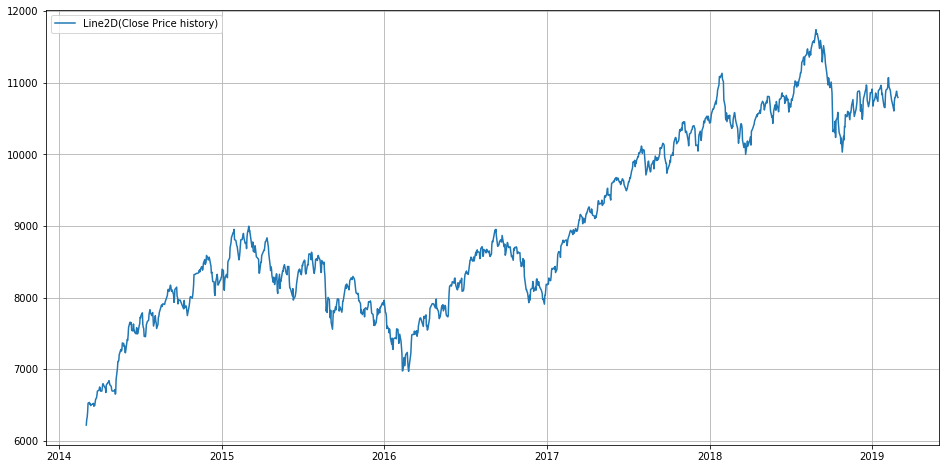

In [4]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
line = plt.plot(df['Close'], label='Close Price history')
plt.rc('grid', linestyle="-", color='black')
plt.legend(line)
plt.grid(True)

## 1. Moving Average

In [5]:
# importing libraries
import pandas as pd
import numpy as np

# reading the data
df = pd.read_csv('Data.csv')

# looking at the first five rows of the data
print(df.head())
print('\n Shape of the data:')
print(df.shape)

# setting the index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

# NOTE: While splitting the data into train and validation set, we cannot use random splitting since that will destroy the time component. So here we have set the last year’s data into validation and the 4 years’ data before that into train set.

# splitting into train and validation
train = new_data[:987]
valid = new_data[987:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)

# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\nRMSE value on validation set:')
print(rms)

         Date     Open     High      Low    Close  Shares Traded  \
0  2014-03-03  6264.35  6277.75  6212.25  6221.45      144562338   
1  2014-03-04  6216.75  6302.15  6215.70  6297.95      166818924   
2  2014-03-05  6328.45  6336.25  6287.80  6328.65      160300066   
3  2014-03-06  6344.75  6406.60  6339.70  6401.15      180731810   
4  2014-03-07  6413.95  6537.80  6413.55  6526.65      284922346   

   Turnover (Rs. Cr)  
0            5040.12  
1            5550.29  
2            5754.58  
3            5844.96  
4           11368.15  

 Shape of the data:
(1233, 7)

 Shape of training set:
(987, 2)

 Shape of validation set:
(246, 2)

RMSE value on validation set:
685.7225943922404


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x0000021CE0CB5A08>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/le

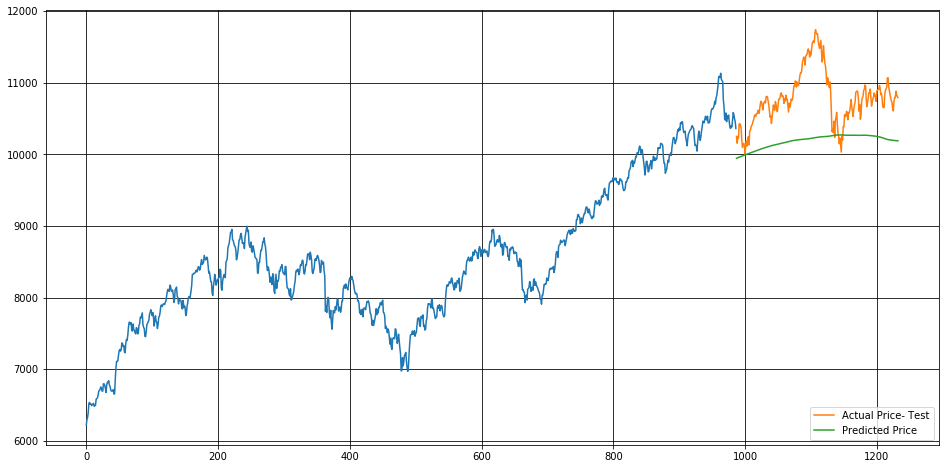

In [6]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.figure(figsize=(16,8))
line1=plt.plot(train['Close'])
line2,line3=plt.plot(valid[['Close', 'Predictions']])
plt.rc('grid', linestyle="-", color='black')
plt.grid(True)
plt.legend([line1,line2,line3],["Actual Price- Train","Actual Price- Test","Predicted Price"],loc='lower right')

#### Inference

The RMSE value is close to 685 but the results are not very promising (as you can gather from the plot). The predicted values are of the same range as the observed values in the train set (there is an increasing trend initially and then a slow decrease).

## 2. Linear Regression

In [7]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [8]:
import re

In [9]:
def add_datepart(df, fldname, drop=True):
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, 
                                     infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 
            'Dayofyear', 'Is_month_end', 'Is_month_start', 
            'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 
            'Is_year_start'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())
    df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
    if drop: df.drop(fldname, axis=1, inplace=True)

In [10]:
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

In [11]:
new_data['mon_fri'] = 0
for i in range(0,len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
#split into train and validation
train = new_data[:987]
valid = new_data[987:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### RMSE Value 

In [13]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

564.3075943494691

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x0000021CE0A72948>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/l

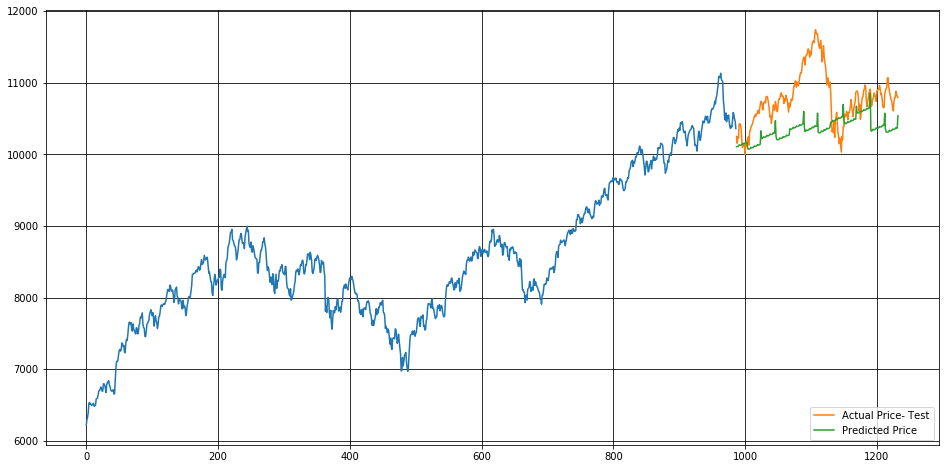

In [14]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[987:].index
train.index = new_data[:987].index
plt.figure(figsize=(16,8))
line1=plt.plot(train['Close'])
line2,line3=plt.plot(valid[['Close', 'Predictions']])
plt.rc('grid', linestyle="-", color='black')
plt.grid(True)
plt.legend([line1,line2,line3],["Actual Price- Train","Actual Price- Test","Predicted Price"],loc='lower right')

plt.grid(True)

#### Inference

Linear regression is a simple technique and quite easy to interpret, but there are a few obvious disadvantages. One problem in using regression algorithms is that the model overfits to the date and month column. Instead of taking into account the previous values from the point of prediction, the model will consider the value from the same date a month ago, or the same date/month a year ago. As seen from the plot above, for January 2016 and January 2017, there was a drop in the stock price. The model has predicted the same for January 2018.

## 3. K Nearest Neighbor Algorithm

In [15]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [16]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### RMSE Value

In [17]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

2859.252525533823

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x0000021CE1260408>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/le

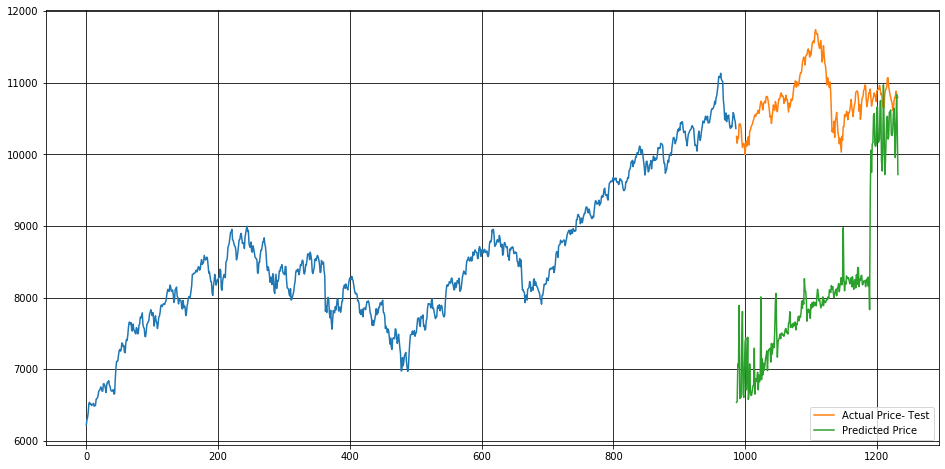

In [18]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.figure(figsize=(16,8))
line1=plt.plot(train['Close'])
line2,line3=plt.plot(valid[['Close', 'Predictions']])
plt.rc('grid', linestyle="-", color='black')
plt.grid(True)
plt.legend([line1,line2,line3],["Actual Price- Train","Actual Price- Test","Predicted Price"],loc='lower right')
plt.rc('grid', linestyle="-", color='black')
plt.grid(True)

#### Inference 

The RMSE value is almost similar to the linear regression model and the plot shows the same pattern. Like linear regression, kNN also identified a drop in January 2018 since that has been the pattern for the past years. We can safely say that regression algorithms have not performed well on this dataset.

## 4. ARIMA

ARIMA is a very popular statistical method for time series forecasting. ARIMA models take into account the past values to predict the future values. There are three important parameters in ARIMA:

~p (past values used for forecasting the next value)

~q (past forecast errors used to predict the future values)

~d (order of differencing)

Parameter tuning for ARIMA consumes a lot of time. So we will use auto ARIMA which automatically selects the best combination of (p,q,d) that provides the least error. To read more about how auto ARIMA works, refer to this article: https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

In [19]:
from pmdarima import auto_arima

data = df.sort_index(ascending=True, axis=0)

train = data[:987]
valid = data[987:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=246)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=11103.017, BIC=11127.425, Fit time=4.432 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=11743.175, BIC=11752.938, Fit time=0.096 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=11440.170, BIC=11459.695, Fit time=2.848 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=11106.954, BIC=11126.480, Fit time=1.836 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=11121.112, BIC=11150.400, Fit time=5.180 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=11683.090, BIC=11702.616, Fit time=1.328 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=11121.113, BIC=11150.401, Fit time=8.049 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=11107.438, BIC=11141.608, Fit time=23.768 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=11111.781, BIC=11141.070, Fit time=3.448 seconds
Fit ARIMA

#### RMSE Value 

In [20]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

386.1390565770734

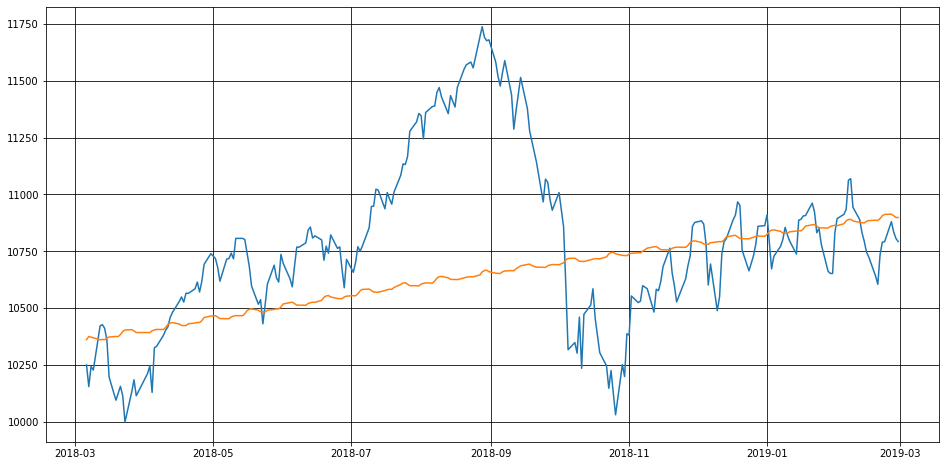

In [22]:
#plot
plt.figure(figsize=(16,8))

plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])
plt.grid(True)

#### Inference 

An auto ARIMA model uses past data to understand the pattern in the time series. Using these values, the model captured an increasing trend in the series. Although the predictions using this technique are far better than that of the previously implemented machine learning models, these predictions are still not close to the real values.

As is evident from the plot, the model has captured a trend in the series, but does not focus on the seasonal part.

## 5. MULTISCALE ARCHITECTURE

LSTMs are widely used for sequence prediction problems and have proven to be extremely effective. The reason they work so well is because LSTM is able to store past information that is important, and forget the information that is not. LSTM has three gates:

~The input gate: The input gate adds information to the cell state

~The forget gate: It removes the information that is no longer required by the model

~The output gate: Output Gate at LSTM selects the information to be shown as output

The statistical tuning of LSTM is extremely computation heavy and hence, for the report, we use it as a blackbox model.

In [42]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:987,:]
valid = dataset[987:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Epoch 1/1
 - 42s - loss: 0.0026


#### RMSE Value 

In [43]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

177.11003255955262

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


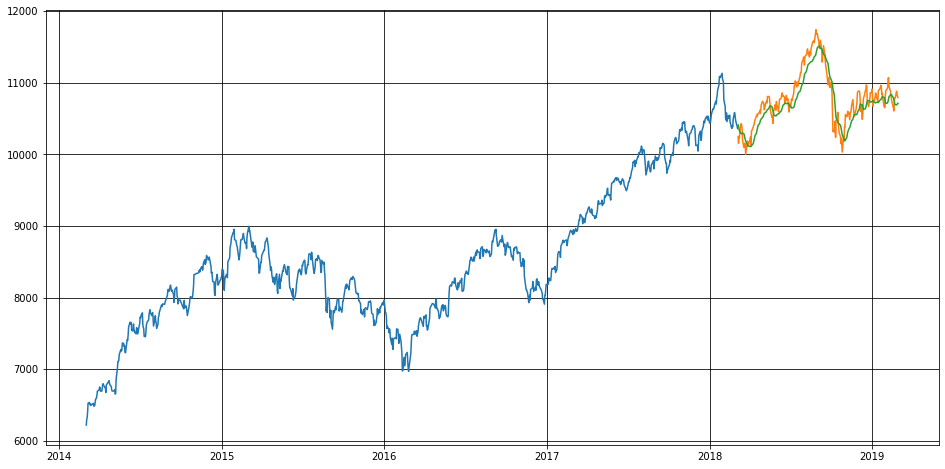

In [53]:
#for plotting
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.grid(True)

#### Inference

The LSTM Model performs exceptionally well in predicting the future prices of the stock market and from the comparative study conducted, emerges as the best prediction model for the share market prices. But the predictions from LSTM are not enough to identify whether the stock price will increase or decrease the reason being the fact that the value for a share price depends more on external factors rather than intrinsic changes.